# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [45]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [18]:
# Import Scipy
from scipy import stats
from scipy.stats import norm

In [26]:
# I use the scipy.stats.norm.rvs with loc = mean, scale = standard deviation, and size = the sample size
random_10 = norm.rvs(loc=50, scale=5, size=10, random_state=None)

In [27]:
# Transform the array into a dataframe so I can plot the histogram
random_10 = pd.DataFrame(random_10)
random_10.head()

,0
0,51.431383
1,54.366128
2,41.536362
3,45.448640
4,54.384129


In [28]:
random_50 = norm.rvs(loc=50, scale=5, size=50, random_state=None)

In [29]:
random_50 = pd.DataFrame(random_50)
random_50.head()

,0
0,48.883305
1,55.914556
2,56.934742
3,42.465197
4,41.301592


In [30]:
random_500 = norm.rvs(loc=50, scale=5, size=500, random_state=None)

In [31]:
random_500 = pd.DataFrame(random_500)
random_500.head()

,0
0,51.511191
1,61.293848
2,57.447609
3,46.512780
4,51.293605


In [32]:
random_5000 = norm.rvs(loc=50, scale=5, size=5000, random_state=None)

In [33]:
random_5000 = pd.DataFrame(random_5000)
random_5000.head()

,0
0,49.930976
1,47.815527
2,50.953199
3,49.419671
4,55.493257


#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa41e5fc7b8>]],
      dtype=object)

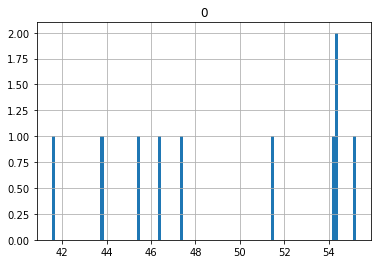

In [34]:
# Using matplotlib to plot each distribution
random_10.hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa41c4372b0>]],
      dtype=object)

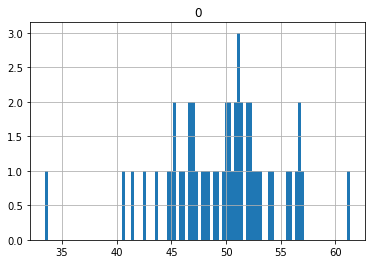

In [35]:
random_50.hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa41e5eca90>]],
      dtype=object)

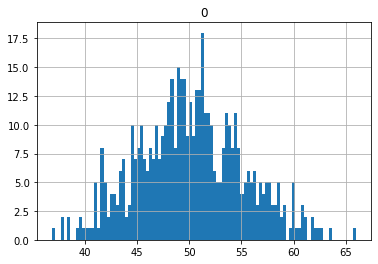

In [36]:
random_500.hist(bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa41bc76898>]],
      dtype=object)

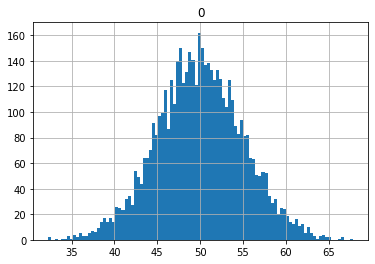

In [37]:
random_5000.hist(bins=100)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
"""
As the sample size n increases from 10 t0 5000 we can see that the distribution is normal. The Central Limit Theorem
says that if the sample size increases we will tend to a normal distribution with the same mean and standard deviation 
as the one from the original samples. And we have confirmed that.
"""

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

In [ ]:
# your code here

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [55]:
from scipy.stats import binom
n = 5
p = 0.15
dist = binom.stats(n,p)
print(dist)

(array(0.75), array(0.6375))


#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

AttributeError: 'tuple' object has no attribute 'pmf'

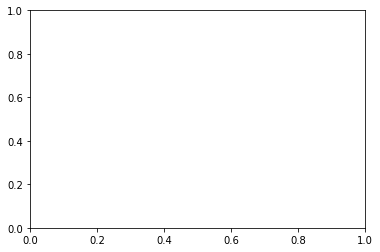

In [56]:
# run this code
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()
# ?????? not working

#### Step 3: Explain what you observe from the plot above.

In [ ]:
"""
The plot shows the probability function. For x = 1 (on the x axis) we see the probability of the advert
being cliked once which is higher than the probability of the advert being clicked twice and so on until the 
low probability of the advert being seen 4 time (in x=4).
"""

#### Step 4: Now plot PMP with 50, 500, and 5000 visitors.
To plot the PMP, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

In [57]:
n = 50
p = 0.15
dist_50 = binom.stats(n,p)
print(dist_50)

(array(7.5), array(6.375))


In [58]:
n = 500
p = 0.15
dist_500 = binom.stats(n,p)
print(dist_500)

(array(75.), array(63.75))


In [59]:
n = 5000
p = 0.15
dist_5000 = binom.stats(n,p)
print(dist_5000)

(array(750.), array(637.5))


#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [ ]:
"""
your comments here
"""

# Challenge 3
#### Step 1: Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
"""
The Poisson distribution is a probability distribution that helps to predict the probability of an event occurring
when you know how often this event has occurred. It can be used to predict sales of books or the amount of people 
going to a restaurant for a specific night.
"""

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [67]:
from scipy.stats import poisson
mu = 300
x = 320
poisson.pmf(x,mu)


0.01216063471394124

#### Step 3: What is the probability of getting 60 visits?

In [63]:
mu = 300
x = 60
poisson.pmf(x,mu)

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [69]:
arr = [poisson.pmf(i,mu) for i in range(1000)]

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

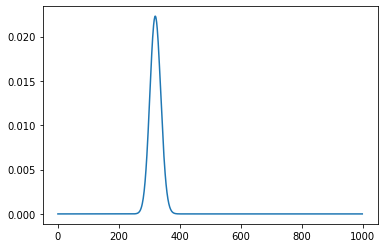

In [70]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [73]:
# We define the mean as loc and the standard deviation as scale
loc = 35
scale = 8
#  The probability is the one for up to 35 minutes minus the one up to 30 minutes:
stats.norm.cdf(35, loc, scale) - stats.norm.cdf(30, loc, scale)

0.23401447095129946

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [74]:
# We can use the Central Limit Theorem with the following values:
loc = 35*200
scale = 8*(200)**(0.5)
#  The probability that it takes up to 115 hours is:
time = 115*60
stats.norm.cdf(time, loc, scale)

0.188379558905791

In [75]:
# So the probability that it takes more than 115 hours is:
1 - stats.norm.cdf(time, loc, scale)

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [76]:
# We define the mean as loc and the standard deviation as scale
loc = 200
scale = 40
#  The probability is 
1 - stats.norm.cdf(300, loc, scale)

0.006209665325776159

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [77]:
stats.norm.cdf(240, loc, scale) - stats.norm.cdf(160, loc, scale)

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [78]:
stats.norm.cdf(150, loc, scale)

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [79]:
1 - stats.norm.cdf(3000, loc, scale)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [80]:
from scipy.stats import poisson
mu = 4
x = 0
poisson.cdf(x,mu)

0.018315638888734182

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [81]:
x = 1
poisson.cdf(x,mu)

0.0915781944436709

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [82]:
poisson.cdf(6,mu) - poisson.cdf(2,mu)

0.6512227160438819

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [83]:
# Probability of having more than 2 robberies in 15 days is the same as having 4 robberies in a month
poisson.cdf(4,mu)

0.6288369351798734